In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
from pathlib import Path
import rasterio
from shapely.geometry import box

In [2]:
pwd

'I:\\hyp3_insar'

In [3]:
insar_path = Path('../hyp3_downloads/desc_lower')
dem_path = [Path(x) for x in insar_path.glob('./*/*dem_clip.tif')][0]

with rasterio.open(dem_path) as meta:
    crs = meta.crs
    transform = meta.transform
    bounds = meta.bounds
    dem = meta.read(1)

bboxras = box(*list(bounds))

In [4]:
ls_path = Path('mapped_landslides')

ls = gpd.read_file(ls_path / 'large_landslidesV2.shp').to_crs(str(crs))

bbox = box(*ls.total_bounds)
bbox10 = bbox.buffer(10000)

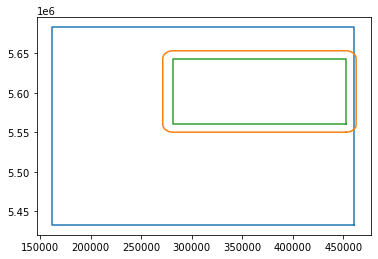

In [5]:
f, ax = plt.subplots(1,1)
ax.plot(*bboxras.exterior.xy)
ax.plot(*bbox10.exterior.xy)
ax.plot(*bbox.exterior.xy)

In [6]:
def coord2pixels(bounds,transform,shape):
    xstep, _, xstart, _, ystep, ystart, _, _, _ = [int(x) for x in transform]
    minx, miny, maxx, maxy = [int(x) for x in bounds]
    
    x0 = int((minx - xstart) / xstep)
    x1 = int((maxx - xstart) / xstep)
    
    y0 = int((maxy - ystart) / ystep)
    y1 = int((miny - ystart) / ystep)
    
    y0, x0 = [max(a,0) for a in (y0, x0)]
    y1, x1 = [min(a,b) for a,b in zip((y1, x1),shape)]
    
    ratio = int(((y1-y0) * (x1-x0)) / (shape[0]*shape[1]) * 100)
    print(f'Window is {ratio}% the size of the origional image')

    return [[y0,y1],[x0,x1]]

In [7]:
window = coord2pixels(bbox10.bounds,transform,dem.shape)
print(f'{window[0][0]}:{window[0][1]},{window[1][0]}:{window[1][1]}')

Window is 26% the size of the origional image
744:3316,2742:7481


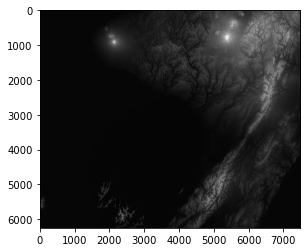

In [8]:
plt.imshow(dem,cmap='gray')

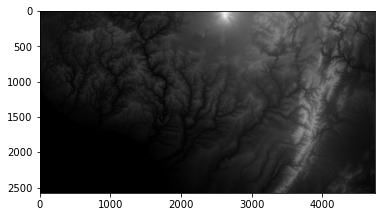

In [9]:
slice_obj = slice(window[0][0],window[0][1]),slice(window[1][0],window[1][1])
plt.imshow(dem[slice_obj],cmap='gray')

In [10]:
boxes = {'asc_upper':'2522:5055,134:4916',
        'desc_lower':'744:3316,2742:7481'}